In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [4]:
output_file = 'results/OzoneCrossVal/results'

total_metrics = pd.read_csv(f'{output_file}.csv')
total_metrics["n_features"] = total_metrics.selected_features.apply(eval).apply(len)


In [5]:
model_params = [col for col in total_metrics.columns if 'model_params' in col or 'selection_params' in col]
grouped = total_metrics.groupby(['dataset', 'selection_name', 'model_name', *model_params], dropna=False).mean()
best_index = grouped.loc[grouped.groupby(['dataset', 'selection_name', 'model_name']).root_mean_squared_error_valid.idxmin()].index

total_metrics_indexed = total_metrics.set_index(['dataset', 'selection_name', 'model_name',*model_params])

total_metrics_indexed.loc[best_index, ['root_mean_squared_error','dataset_params_test_year']].reset_index()

,dataset,selection_name,model_name,selection_params,model_params_keep_dims,model_params_max_depth,model_params_type,model_params_regularization,selection_params_regularization,model_params_layers,model_params_units,root_mean_squared_error,dataset_params_test_year
0,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,18.235431,2005
1,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,19.797906,2006
2,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,16.762712,2007
3,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,18.615094,2008
4,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,18.603454,2009
5,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,17.767116,2010
6,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,16.364136,2011
7,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,18.828769,2012
8,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,16.409510,2013
9,aljarafe,NoSelection,decisiontree,NaN,False,7.0,sklearn,NaN,NaN,NaN,NaN,16.636810,2014


In [6]:
grouped

mean_squared_error  \
dataset  selection_name     model_name   selection_params model_params_keep_dims model_params_max_depth model_params_type model_params_regularization selection_params_regularization model_params_layers model_params_units                       
aljarafe NoSelection        decisiontree NaN              False                  2.0                    sklearn           NaN                         NaN                             NaN                 NaN                         361.412920   
                                                                                 6.0                    sklearn           NaN                         NaN                             NaN                 NaN                         322.667145   
                                                                                 7.0                    sklearn           NaN                         NaN                             NaN                 NaN                         317.437230   
                                                                                 8.0                    sklearn           NaN                         NaN                             NaN                 NaN                         355.761276   
                                                                                 13.0                   sklearn           NaN                         NaN                             NaN                 NaN                         526.488292   
                                                                                 14.0                   sklearn           NaN                         NaN                             NaN                 NaN                         538.068633   
                            lasso        NaN              False                  NaN                    sklearn           0.000114                    NaN                             NaN                 NaN                         281.302307   
                                                                                                                          0.027388                    NaN                             NaN                 NaN                         283.493673   
                                                                                                                          0.140387                    NaN                             NaN                 NaN                         327.552914   
                                                                                                                          0.146756                    NaN                             NaN                 NaN                         315.918059   
                                                                                                                          0.186260                    NaN                             NaN                 NaN                         322.003806   
                                                                                                                          0.204452                    NaN                             NaN                 NaN                         337.894623   
                                                                                                                          0.396767                    NaN                             NaN                 NaN                         447.329564   
                                                                                                                          0.417022                    NaN                             NaN                 NaN                         467.874722   
                                                                                                                          0.417305                    NaN                             NaN                 NaN                         463.217020   
                                                                          

In [112]:
best_metrics = total_metrics.iloc[total_metrics.groupby(['dataset', 'selection_name', 'model_name']).mean_absolute_error_valid.idxmin()].reset_index(drop=True)
best_metrics.pivot(values=['root_mean_squared_error','n_features', 'dataset_params_test_year'], index = ['dataset', 'selection_name', 'model_name'], columns=[])

root_mean_squared_error  n_features  \
dataset  selection_name     model_name                                          
aljarafe NoSelection        decisiontree                16.549971        36.0   
                            lasso                       15.770303       221.0   
         TimeSelectionLayer dense                       15.893884        13.0   

                                          dataset_params_test_year  
dataset  selection_name     model_name                              
aljarafe NoSelection        decisiontree                    2014.0  
                            lasso                           2014.0  
         TimeSelectionLayer dense                           2014.0

In [25]:
total_metrics.groupby(['dataset', 'selection_name', 'model_name', 'dataset_params_pred_len']).min().reset_index().pivot(values=['root_mean_squared_error', 'duration'], index = ['dataset', 'selection_name', 'model_name'], columns=['dataset_params_pred_len'])

root_mean_squared_error  \
dataset_params_pred_len                                                 1    
dataset    selection_name             model_name                             
aljarafe   Correlation                cnn                         7.662278   
                                      dense                      10.234553   
                                      lstm                        8.280345   
           Linear                     cnn                         9.045971   
                                      dense                       9.414360   
                                      lstm                        8.576753   
           MutualInformation          cnn                         8.555103   
                                      dense                       9.415852   
                                      lstm                        8.622842   
           NoSelection                cnn                         8.417395   
                                      dense                      15.834354   
                                      lstm                        9.213415   
           TimeSelectionLayer         cnn                         8.861936   
                                      dense                       7.970662   
                                      lstm                        8.145095   
           TimeSelectionLayerConstant cnn                         8.697409   
                                      dense                       7.746988   
                                      lstm                        8.093153   
           TimeSelectionLayerSmooth   cnn                         8.488527   
                                      dense                       7.482698   
                                      lstm                        7.802259   
           decisiontree               decisiontree               13.544070   
           lasso                      lasso                      14.773974   
asomadilla Correlation                cnn                        10.375857   
                                      dense                      10.086884   
                                      lstm                       14.322941   
           Linear                     cnn                         9.281284   
                                      dense                      10.880388   
                                      lstm                       13.627715   
           MutualInformation          cnn                         9.935072   
                                      dense                      10.072994   
                                      lstm                       14.514473   
           NoSelection                cnn                        11.512335   
                                      dense                      13.400673   
                                      lstm                       14.562703   
           TimeSelectionLayer         cnn                         9.283930   
                                      dense                       9.752887   
                                      lstm                       26.632891   
           TimeSelectionLayerConstant cnn                         9.587027   
                                      dense                      10.118891   
                                      lstm                       25.995283   
           TimeSelectionLayerSmooth   cnn                         9.581835   
                                      dense                       9.534624   
                                      lstm                       13.928735   
           decisiontree               decisiontree               15.809587   
           lasso                      lasso                      25.350666   

                                                                          \
dataset_params_pred_len                                    8          16   
dataset    selection_name             model_name                           


<Figure size 1440x1440 with 0 Axes>

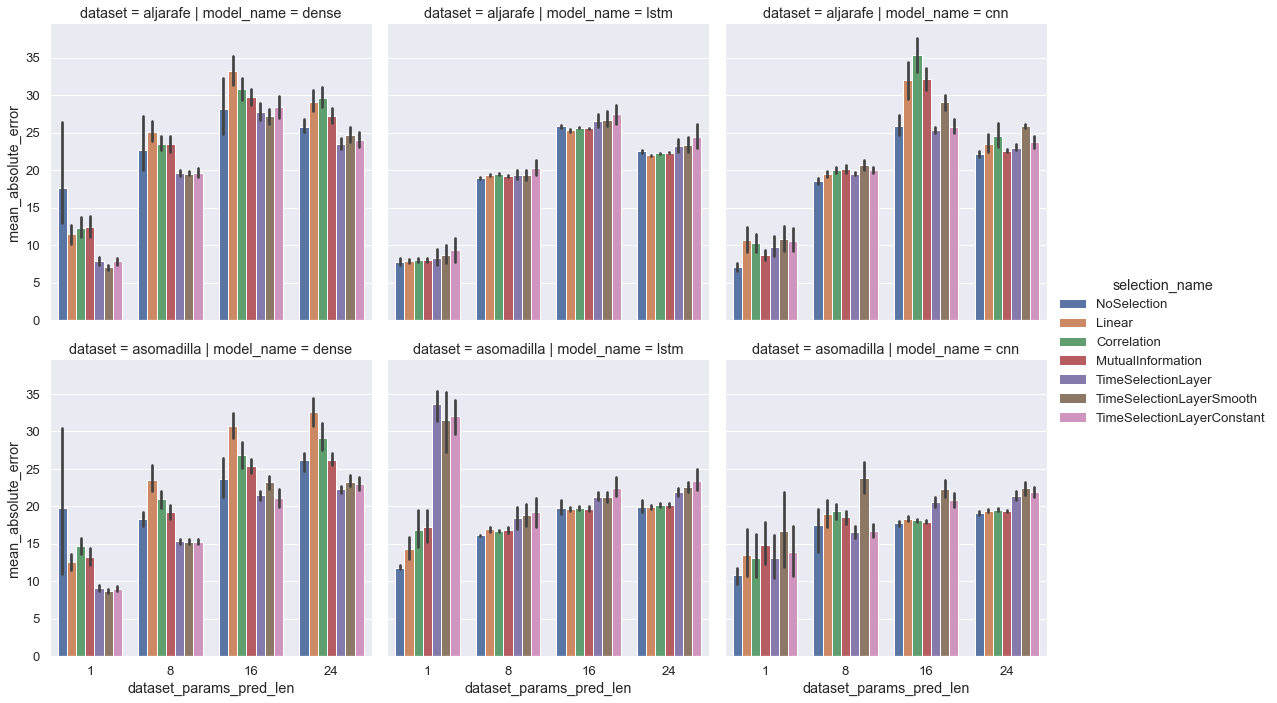

In [18]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20,20))
sns.catplot(data=total_metrics[(total_metrics.model_name!='decisiontree') & (total_metrics.model_name!='lasso')], kind='bar', x="dataset_params_pred_len", y="mean_absolute_error", hue="selection_name", col='model_name', row="dataset")#.set_yscale("log")

<Figure size 1440x720 with 0 Axes>

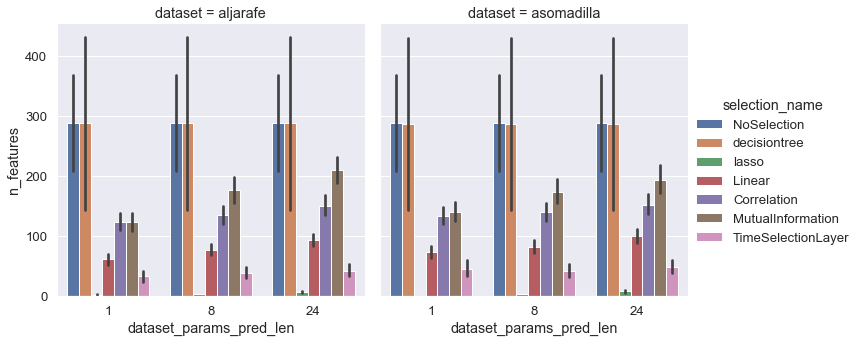

In [5]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20,10))
total_metrics = total_metrics[total_metrics.selection_name!='TimeSelectionLayerSmooth']
total_metrics.loc[total_metrics.model_name=='decisiontree', 'selection_name'] = 'decisiontree'
total_metrics.loc[total_metrics.model_name=='lasso', 'selection_name'] = 'lasso'

sns.catplot(data=total_metrics, kind='bar', x="dataset_params_pred_len", y="n_features", hue="selection_name", col='dataset')#.set_yscale("log")

In [7]:
output_file = 'results/Ozone/results_regularizerv2'

total_metrics = pd.read_csv(f'{output_file}.csv')

best_metrics = total_metrics.iloc[total_metrics.groupby(['dataset', 'selection_name', 'model_name', 'dataset_params_pred_len']).mean_absolute_error.idxmin()].reset_index(drop=True)
best_metrics["n_features"] = best_metrics.selected_features.apply(eval).apply(len)
best_metrics.pivot(values=['mean_absolute_error','n_features', 'dataset_params_seq_len', 'selection_params_regularization'], index = ['dataset', 'selection_name', 'model_name'], columns=['dataset_params_pred_len'])

mean_absolute_error             \
dataset_params_pred_len                                       1          8    
dataset  selection_name           model_name                                  
aljarafe TimeSelectionLayer       cnn                   6.378154  18.544676   
                                  dense                 6.262439  18.439611   
                                  lstm                  6.147216  17.873425   
         TimeSelectionLayerSmooth dense                 6.617157        NaN   

                                                        n_features        \
dataset_params_pred_len                              24         1     8    
dataset  selection_name           model_name                               
aljarafe TimeSelectionLayer       cnn         21.511643        9.0  14.0   
                                  dense       21.026711       41.0  23.0   
                                  lstm        21.552996        5.0  48.0   
         TimeSelectionLayerSmooth dense             NaN       16.0   NaN   

                                                   dataset_params_seq_len  \
dataset_params_pred_len                         24                     1    
dataset  selection_name           model_name                                
aljarafe TimeSelectionLayer       cnn         55.0                   24.0   
                                  dense       94.0                   72.0   
                                  lstm        66.0                   48.0   
         TimeSelectionLayerSmooth dense        NaN                   24.0   

                                                          \
dataset_params_pred_len                         8     24   
dataset  selection_name           model_name               
aljarafe TimeSelectionLayer       cnn         24.0  72.0   
                                  dense       48.0  48.0   
                                  lstm        48.0  48.0   
         TimeSelectionLayerSmooth dense        NaN   NaN   

                                             selection_params_regularization  \
dataset_params_pred_len                                                   1    
dataset  selection_name           model_name                                   
aljarafe TimeSelectionLayer       cnn                                0.00050   
                                  dense                              0.00001   
                                  lstm                               0.00100   
         TimeSelectionLayerSmooth dense                              0.00001   

                                                               
dataset_params_pred_len                           8        24  
dataset  selection_name           model_name                   
aljarafe TimeSelectionLayer       cnn         0.0005  0.00010  
                                  dense       0.0001  0.00001  
                                  lstm        0.0001  0.00005  
         TimeSelectionLayerSmooth dense          NaN      NaN

<AxesSubplot:xlabel='Dataset', ylabel='mean_absolute_error'>

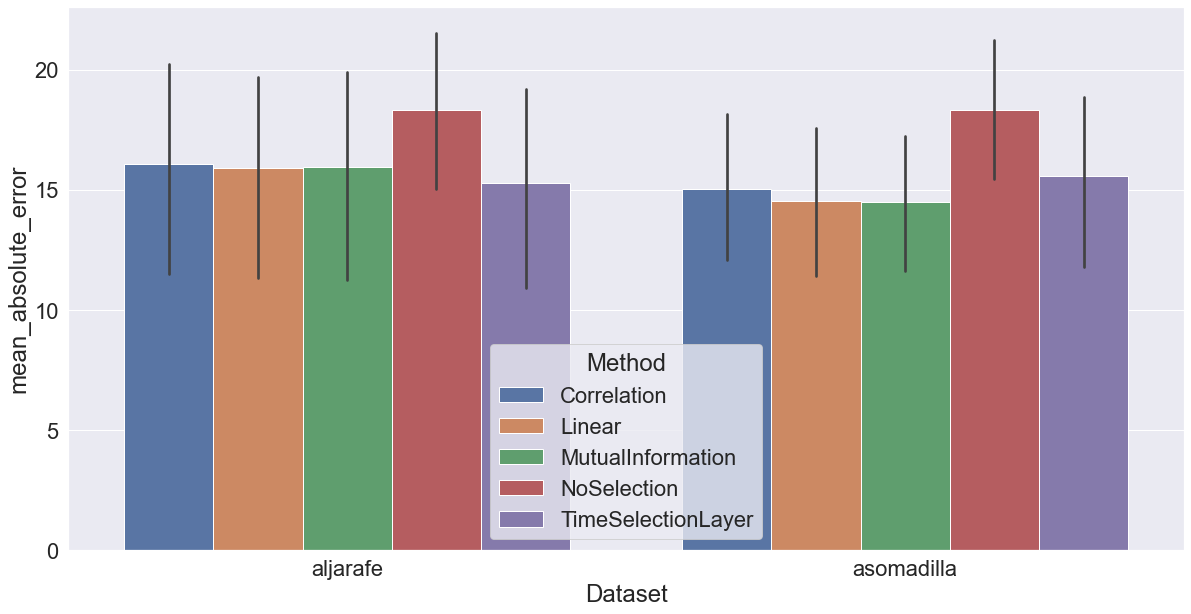

<AxesSubplot:xlabel='Method', ylabel='mean_absolute_error'>

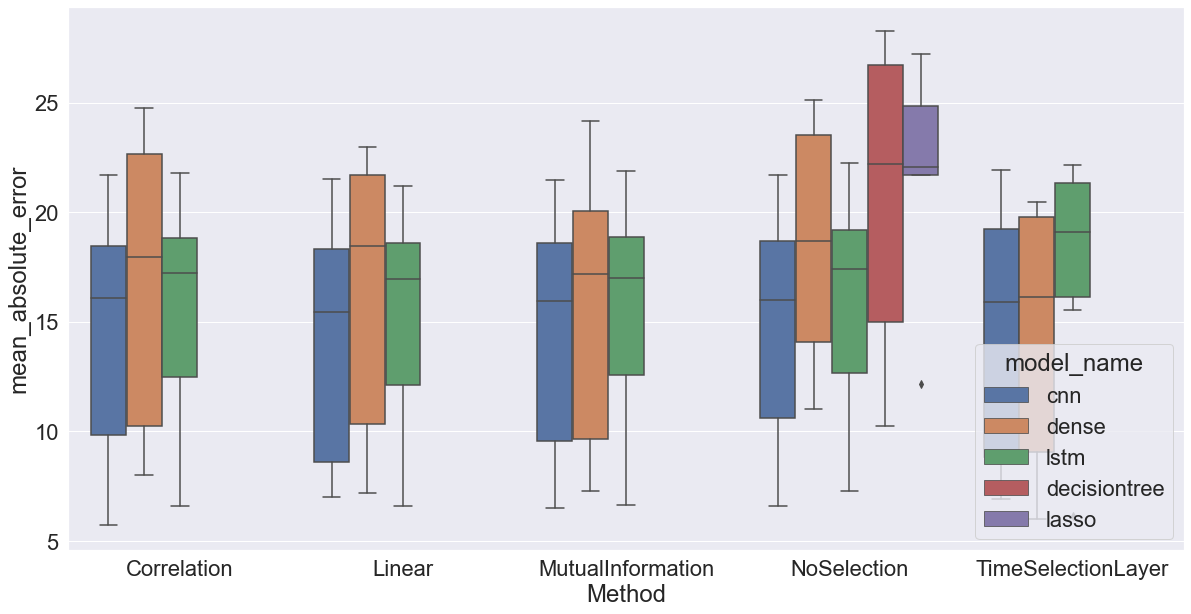

In [7]:
sns.set(font_scale=2)
plt.figure(figsize=(20,10))
sns.boxplot(data=best_metrics.rename(columns={"dataset": "Dataset", "n_features": "# Features", "selection_name": "Method"}), x="Method", y="mean_absolute_error", hue="model_name")#.set_yscale("log")